### CNN to discriminate 1 and 2 particles event

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Data Structure**

In [2]:
path='/nfs/pic.es/user/m/mrodrigu/common/CNN_discriminate_1-2_particles/CNN_bulding/input.csv'

In [3]:
input_paths=pd.read_csv(path)

In [4]:
input_paths

,event,nhits,"[row, col, qmax, tmax]",npart
0,5893,186,"[[39, 125, 286, 156], [38, 125, 370, 106], [37...",1
1,8337,318,"[[59, 35, 1051, 342], [59, 34, 800, 343], [59,...",2
2,7457,379,"[[56, 26, 294, 364], [57, 26, 292, 345], [57, ...",2
3,8259,286,"[[32, 62, 1374, 119], [33, 62, 335, 148], [41,...",1
4,576,224,"[[37, 89, 326, 71], [36, 88, 308, 81], [36, 89...",1
...,...,...,...,...
19993,8691,371,"[[36, 61, 294, 123], [36, 62, 852, 76], [37, 6...",1
19994,7606,361,"[[56, 49, 376, 353], [56, 50, 904, 345], [56, ...",2
19995,8464,210,"[[36, 60, 287, 177], [36, 61, 424, 120], [36, ...",1
19996,7720,208,"[[36, 88, 291, 192], [36, 89, 375, 94], [35, 8...",1


In [5]:
def parse_list_column(column):
    try:
        return eval(column)
    except:
        return []

input_paths['[row, col, qmax, tmax]'] = input_paths['[row, col, qmax, tmax]'].apply(parse_list_column)

data_list = input_paths['[row, col, qmax, tmax]'].tolist()

These are the types of images we want CNN to differentiate:

- 1 particle event:

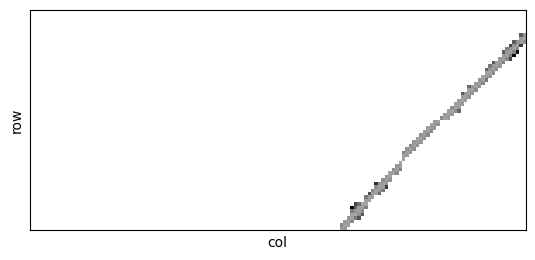

In [6]:
matrix= np.zeros((64, 144))
for array in input_paths.at[0, '[row, col, qmax, tmax]']:
    row, col, qmax, tmax = array
    matrix[row][col] = tmax

plt.imshow(matrix, cmap='Greys', origin='lower')  
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel('col')  
plt.ylabel('row')  
plt.show()

- 2 particle event:

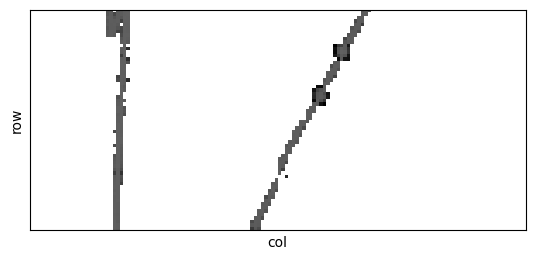

In [7]:
matrix= np.zeros((64, 144))
for array in input_paths.at[2, '[row, col, qmax, tmax]']:
    row, col, qmax, tmax = array
    matrix[row][col] = tmax

plt.imshow(matrix, cmap='Greys', origin='lower')  
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel('col')  
plt.ylabel('row')  
plt.show()

Number of data we have in the dataframe:

In [8]:
n_events=len(input_paths)
n_events

19998

The data is divided into training data (70%) and test data (30%):

In [9]:
training_data = input_paths.iloc[:13999]
test_data = input_paths.iloc[13999+ 1:]

- Training Data:

In [10]:
training_data

,event,nhits,"[row, col, qmax, tmax]",npart
0,5893,186,"[[39, 125, 286, 156], [38, 125, 370, 106], [37...",1
1,8337,318,"[[59, 35, 1051, 342], [59, 34, 800, 343], [59,...",2
2,7457,379,"[[56, 26, 294, 364], [57, 26, 292, 345], [57, ...",2
3,8259,286,"[[32, 62, 1374, 119], [33, 62, 335, 148], [41,...",1
4,576,224,"[[37, 89, 326, 71], [36, 88, 308, 81], [36, 89...",1
...,...,...,...,...
13994,8496,214,"[[38, 70, 290, 113], [38, 71, 616, 74], [37, 6...",1
13995,8836,204,"[[38, 70, 343, 90], [38, 71, 497, 76], [37, 69...",1
13996,6455,357,"[[45, 53, 290, 393], [44, 53, 291, 345], [43, ...",2
13997,2414,206,"[[32, 61, 544, 60], [32, 62, 461, 65], [33, 61...",1


- Test Data:

In [11]:
test_data.reset_index(drop=True, inplace=True)

In [12]:
test_data

,event,nhits,"[row, col, qmax, tmax]",npart
0,8163,362,"[[56, 69, 291, 327], [56, 70, 744, 287], [56, ...",2
1,8556,155,"[[36, 132, 329, 108], [36, 133, 1412, 90], [36...",1
2,2970,219,"[[32, 96, 290, 151], [32, 97, 812, 91], [32, 9...",1
3,8680,356,"[[56, 30, 565, 329], [56, 31, 336, 333], [57, ...",2
4,7867,234,"[[36, 61, 294, 95], [36, 62, 490, 75], [37, 62...",1
...,...,...,...,...
5993,8691,371,"[[36, 61, 294, 123], [36, 62, 852, 76], [37, 6...",1
5994,7606,361,"[[56, 49, 376, 353], [56, 50, 904, 345], [56, ...",2
5995,8464,210,"[[36, 60, 287, 177], [36, 61, 424, 120], [36, ...",1
5996,7720,208,"[[36, 88, 291, 192], [36, 89, 375, 94], [35, 8...",1


**Cleaning Data**

1) Input (x)

A tensor is built with the images input:

- Training tensor Data:

In [14]:
tensor_shape = (len(training_data), 64, 144)  
training_data_tensor = np.zeros(tensor_shape)  

for i in range(len(training_data)):
    matrix = np.zeros((64, 144))
    for array in training_data.at[i, '[row, col, qmax, tmax]']:
        row, col, qmax, tmax = array
        matrix[row][col] = tmax
    training_data_tensor[i] = matrix  

Dimensions of the Training tensor Data (nº of images, row, col):

In [15]:
training_data_tensor.shape

(13999, 64, 144)

In [16]:
n_events_training_tensor=len(training_data)
n_events_training_tensor

13999

In [17]:
tmax_list = []

for i in range(training_data_tensor.shape[0]):
    for j in range(training_data_tensor.shape[1]):
        for k in range(training_data_tensor.shape[2]):
            if training_data_tensor[i, j, k] != 0:
                tmax_list.append(training_data_tensor[i, j, k])

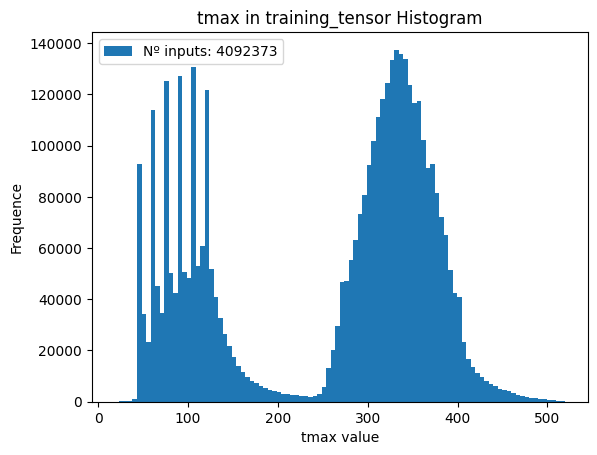

In [18]:
num_inputs= len(tmax_list)

plt.hist(tmax_list, bins=100) 

plt.xlabel('tmax value')
plt.ylabel('Frequence')
plt.title('tmax in training_tensor Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.show()

- Test tensor Data:

In [19]:
tensor_shape_2 = (len(test_data), 64, 144)  
test_data_tensor = np.zeros(tensor_shape_2)  
tmax_array=[]

for i in range(len(test_data)):
    matrix = np.zeros((64, 144))
    for array in test_data.at[i, '[row, col, qmax, tmax]']:
        row, col, qmax, tmax = array
        matrix[row][col] = tmax
        tmax_array.append(tmax)
    test_data_tensor[i] = matrix  

Dimensions of the Test tensor Data (nº of images, row, col):

In [30]:
test_data_tensor.shape

(5998, 64, 144)

In [20]:
n_events_test_tensor=len(test_data)
n_events_test_tensor

5998

In [21]:
tmax_list_2 = []

for i in range(test_data_tensor.shape[0]):
    for j in range(test_data_tensor.shape[1]):
        for k in range(test_data_tensor.shape[2]):
            if test_data_tensor[i, j, k] != 0:
                tmax_list_2.append(test_data_tensor[i, j, k])

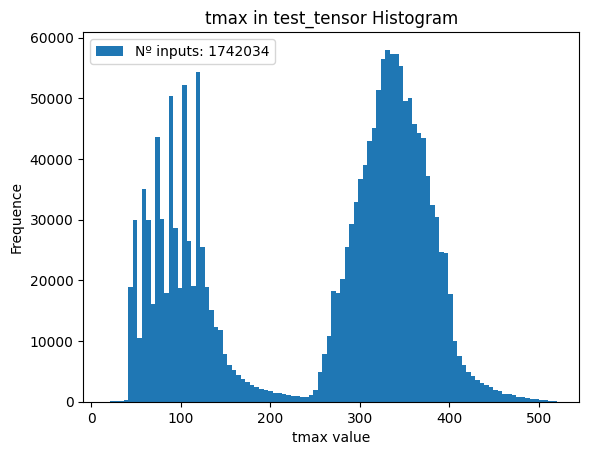

In [23]:
num_inputs= len(tmax_list_2)

plt.hist(tmax_list_2, bins=100) 

plt.xlabel('tmax value')
plt.ylabel('Frequence')
plt.title('tmax in test_tensor Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.show()

- Tensor Reshape:

A dimension referring to the color channel of the images (1 for gray, 3 for RGB) is added to the tensors:

In [24]:
x_train = training_data_tensor.reshape(len(training_data), 64, 144, 1) #nº images, row, col, nº channel colors (1 for grey, 3 for RGB)
x_test = test_data_tensor.reshape(len(test_data), 64, 144, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

Dimensions of the input:

In [25]:
x_train.shape, x_test.shape

((13999, 64, 144, 1), (5998, 64, 144, 1))

2) Output (y)

In [26]:
y_train=training_data['npart'].to_numpy()
y_test=test_data['npart'].to_numpy()

There are two classes (1 and 2 particles), to use the CNN we have to convert 1 to 0, and 2 to 1:

In [27]:
y_train-=1
y_test-=1

Convert the dependent variable in the form of integers to a binary class matrix.

In [28]:
from keras.utils import to_categorical
num_classes = 2

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

2023-09-17 12:50:53.484541: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-17 12:50:55.604532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 12:51:00.174397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Dimensions of the output:

In [29]:
y_train.shape, y_test.shape

((13999, 2), (5998, 2))

**Design Model**

The first step is to add a convolutional layer, which takes the input image:

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()  # creating the model
model.add(Conv2D(32, kernel_size=(3, 3),  # nº filters=32, kernel size=(3,3)
     activation='relu', #activation function= ReLU
     input_shape=(64, 144, 1))) # this specifies the way images are input to the layer, dimensions of the input=(row, col, channel input)


2023-09-17 12:51:28.626023: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(A relu activation stands for “Rectified Linear Units”, which takes the max of a value or zero).   
   
Next, we add another convolutional layer, followed by a pooling layer:

In [31]:
model.add(Conv2D(64, (3, 3), activation='relu')) # convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer

Next, we add a “dropout” layer. While neural networks are trained on huge datasets, a problem of overfitting may occur. To avoid this issue, we randomly drop units and their connections during the training process. In this case, we’ll drop 25% of the units:

In [69]:
#model.add(Dropout(0.25))

Next, we add a flattening layer to convert the previous hidden layer into a 1D array:

In [32]:
model.add(Flatten())

Once we’ve flattened the data into a 1D array, we can add a dense hidden layer, which is normal for a traditional neural network. Next, add another dropout layer before adding a final dense layer which classifies the data:

In [33]:
model.add(Dense(128, activation='relu')) # dense refers to a completely connected layer
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='relu')) # softmax or relu

The softmax activation is used when we’d like to classify the data into a number of pre-decided classes.

**Compile and Train Model**

In the model design process, we’ve created an empty model without an objective function. We need to compile the model and specify a loss function, an optimizer function, and a metric to assess model performance.

We need to use a sparse_categorical_crossentropy() loss function in case we have an integer-dependent variable. For a vector-based dependent variable like a ten-size array as the output of each test case, use categorical_crossentropy. In this example, we’ll use the adam optimizer. The metric is the basis for the assessment of our model performance, though it’s only for us to judge and isn’t used in the training step:

In [34]:
model.compile(loss='mean_squared_error', #MSE o binary_crossentropy (2 discrimination) (las entradas normalizadas entre 0 y 1)
      optimizer='adam',
      metrics=['accuracy'])

We’re now ready to train the model using the .fit() method. We need to specify an epoch and batch size when training the model. An epoch is one forward pass and one backward pass of all training examples. A batch size is the number of training examples in one forward or backward pass.

In [35]:
x_train.shape, x_test.shape

((13999, 64, 144, 1), (5998, 64, 144, 1))

In [36]:
y_train.shape, y_test.shape

((13999, 2), (5998, 2))

In [37]:
batch_size = 128
epochs = 100

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/100
110/110 [==============================] - 23s 197ms/step - loss: 0.2197 - accuracy: 0.7616 - val_loss: 0.0053 - val_accuracy: 0.9992
Epoch 2/100
110/110 [==============================] - 21s 193ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 3/100
110/110 [==============================] - 22s 196ms/step - loss: 5.5712e-04 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 4/100
110/110 [==============================] - 21s 194ms/step - loss: 1.9638e-04 - accuracy: 1.0000 - val_loss: 9.0318e-04 - val_accuracy: 0.9993
Epoch 5/100
110/110 [==============================] - 21s 194ms/step - loss: 9.8021e-05 - accuracy: 1.0000 - val_loss: 9.2813e-04 - val_accuracy: 0.9993
Epoch 6/100
110/110 [==============================] - 21s 195ms/step - loss: 6.4882e-05 - accuracy: 1.0000 - val_loss: 8.6211e-04 - val_accuracy: 0.9993
Epoch 7/100
110/110 [==============================] - 22s 203ms/step - loss: 5.2336e-05 - accur

/nfs/pic.es/user/m/mrodrigu/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Evaluating the results**

Confusion Matrix:

188/188 [==============================] - 5s 25ms/step


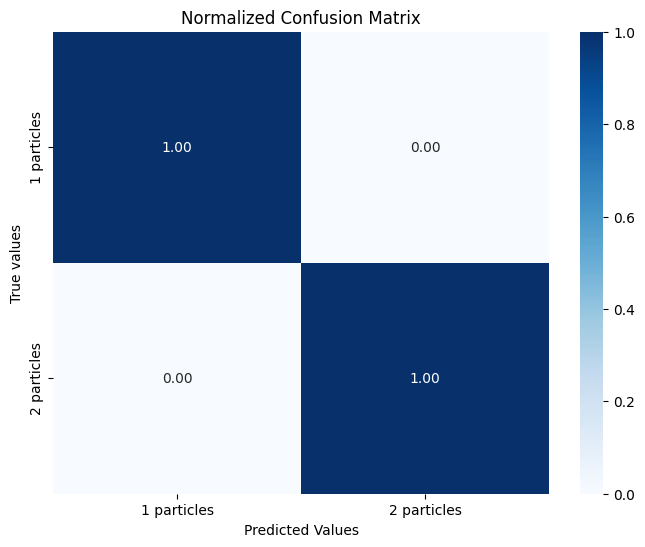

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the classes in the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted classes

# Get the actual classes of the test set
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
confusion_mtx_normalized=confusion_mtx/confusion_mtx.sum(axis=1, keepdims=True)

# Represent the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["1 particles", "2 particles"],
            yticklabels=["1 particles", "2 particles"])
plt.xlabel('Predicted Values')
plt.ylabel('True values')
plt.title('Normalized Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=200)
plt.show()


Loss and Accuracy:

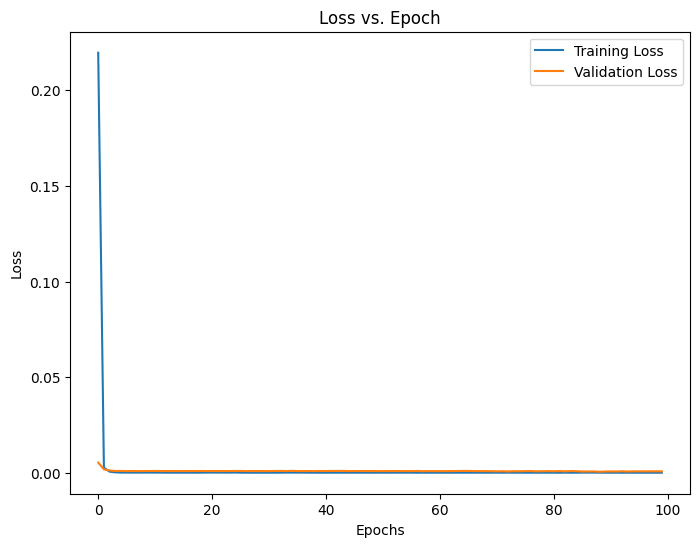

In [39]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Loss graph
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.savefig('loss_graph.png', dpi=200)
plt.show()

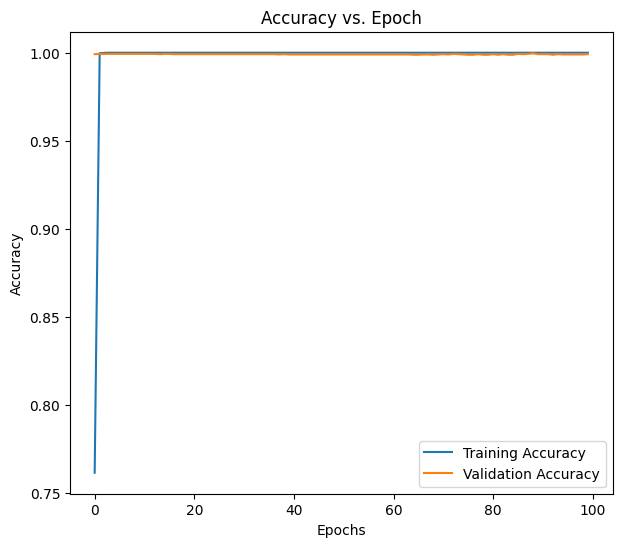

In [40]:
# Accuracy graph
plt.figure(figsize=(7, 6))
plt.plot(range(epochs), train_acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.savefig('accuracy_graph.png', dpi=200)
plt.show()

ROC (Receiver Operating Characteristic) curve:
<div align="center">
$TPR = \frac{TP}{TP + FN}$ &nbsp;&nbsp;&nbsp; $FPR = \frac{FP}{FP + TN}$
</div>

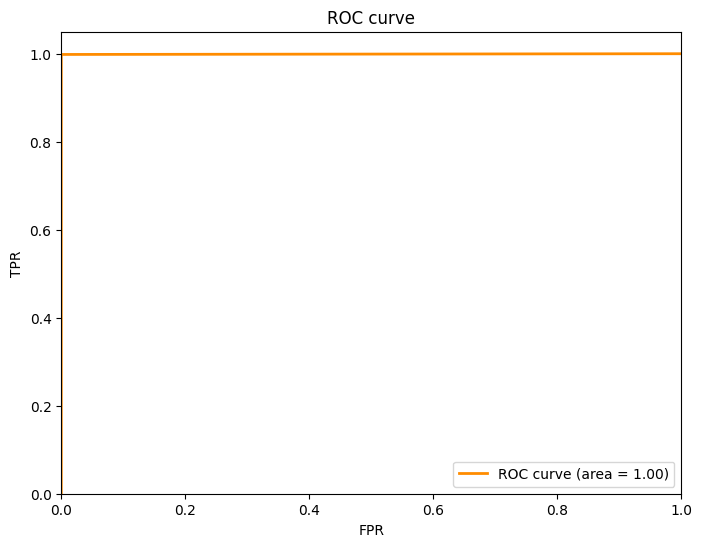

In [41]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = roc_curve(y_true, y_pred_classes)[0]
tpr = roc_curve(y_true, y_pred_classes)[1]
roc_auc=auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=200)
plt.show()
